# Analyse d'une image de microscopie à l'aide du module scikit image
Ce notebook à pour objectif d'ilustrer une utilisation simplifé du module scikit image pour l'analise d'une image issue d'un microscope photonique à épifluorescence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
import skimage.exposure
import skimage.measure

import sys
import os
from urllib.request import urlretrieve

## Chargement de l'image à analiser, unzip de l'image et visualisation de l'image

In [52]:
if not os.path.isfile('FluorescentCells.zip'):
    print('Downloading the FASTA file for fluorescent cells image...')
    try:
        urlretrieve('https://imagej.nih.gov/ij/images/FluorescentCells.zip',
            'FluorescentCells.zip')
        print("ok")
    except:
        print("Unable to download the file!")
    print('Done!')

if not os.path.isfile("FluorescentCells.tif"):
    !unzip FluorescentCells.zip

ok
Done!
Archive:  FluorescentCells.zip
  inflating: FluorescentCells.tif    


In [54]:
img = skimage.io.imread("FluorescentCells.tif")

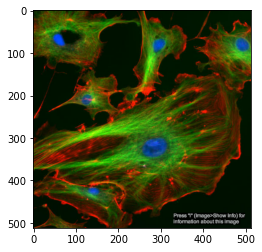

In [55]:
plt.imshow(img);

## Transformation de l'image RGB en niveaux de gris

In [56]:
from skimage.color import rgb2gray

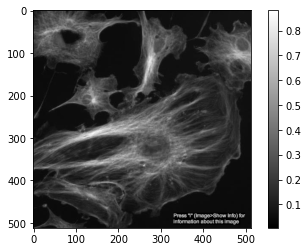

In [57]:
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap = plt.get_cmap('gray'))
plt.colorbar()

## Sélection du filtre bleu

In [58]:
img2 = np.array(img)
for raw in range(img2.shape[0]):
    for col in range(img2.shape[1]):
        img2[raw, col][0] = 0
        img2[raw, col][1] = 0

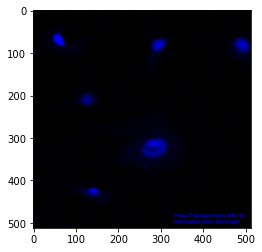

In [59]:
plt.imshow(img2);

## Sélection du filtre rouge

In [60]:
img2 = np.array(img)
for raw in range(img2.shape[0]):
    for col in range(img2.shape[1]):
        img2[raw, col][1] = 0
        img2[raw, col][2] = 0

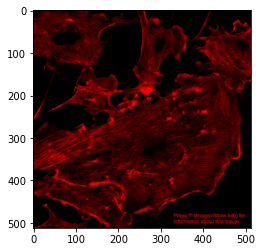

In [61]:
plt.imshow(img2);

## Sélection du filtre vert

In [62]:
img2 = np.array(img)
for raw in range(img2.shape[0]):
    for col in range(img2.shape[1]):
        img2[raw, col][0] = 0
        img2[raw, col][2] = 0

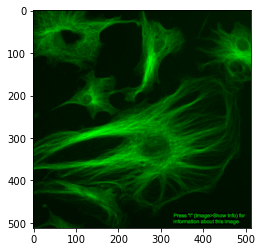

In [63]:
plt.imshow(img2);

## Test de marquage de la membrane cellulaire

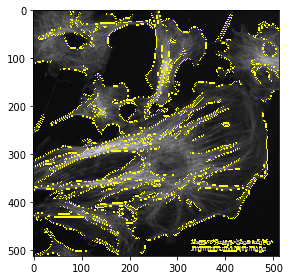

In [64]:
from skimage import feature
from skimage import segmentation
image_edges = feature.canny(img_gray, sigma = 2)
image = segmentation.mark_boundaries(img_gray, image_edges)
skimage.io.imshow(image)
skimage.io.show()